<a href="https://colab.research.google.com/github/Mohammad-Rayyan97/ML-Projects/blob/main/cat_vs_dog_classification_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# !pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:07<00:00, 76.5MB/s]
100% 812M/812M [00:07<00:00, 113MB/s] 


In [ ]:
# extracting zip files
from zipfile import ZipFile

data  = '/content/dogs-vs-cats.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()


In [ ]:
# extracting train files
from zipfile import ZipFile

data  = '/content/train.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

In [ ]:
# extracting test files
from zipfile import ZipFile

data  = '/content/test1.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

In [ ]:
import os
file_names = os.listdir('/content/train')
print(file_names)
print(len(file_names))

['cat.532.jpg', 'dog.7534.jpg', 'cat.10453.jpg', 'dog.1407.jpg', 'cat.372.jpg', 'cat.1732.jpg', 'cat.4802.jpg', 'cat.7393.jpg', 'cat.2701.jpg', 'cat.677.jpg', 'dog.7037.jpg', 'dog.5307.jpg', 'cat.453.jpg', 'cat.4327.jpg', 'cat.2384.jpg', 'cat.12480.jpg', 'cat.3157.jpg', 'dog.6946.jpg', 'dog.4996.jpg', 'dog.12288.jpg', 'dog.2855.jpg', 'cat.6230.jpg', 'cat.3541.jpg', 'dog.9469.jpg', 'dog.7940.jpg', 'cat.8769.jpg', 'cat.2195.jpg', 'dog.1906.jpg', 'cat.12325.jpg', 'dog.11427.jpg', 'cat.9242.jpg', 'dog.7243.jpg', 'dog.2467.jpg', 'dog.3909.jpg', 'cat.11116.jpg', 'dog.3039.jpg', 'dog.9268.jpg', 'dog.7778.jpg', 'cat.7586.jpg', 'cat.2835.jpg', 'dog.6061.jpg', 'dog.1041.jpg', 'dog.9219.jpg', 'cat.4011.jpg', 'dog.11259.jpg', 'dog.1423.jpg', 'cat.3293.jpg', 'cat.7003.jpg', 'dog.2588.jpg', 'cat.1523.jpg', 'cat.5100.jpg', 'dog.1957.jpg', 'cat.8895.jpg', 'cat.11101.jpg', 'cat.6691.jpg', 'dog.4597.jpg', 'dog.2955.jpg', 'cat.9461.jpg', 'dog.748.jpg', 'cat.2742.jpg', 'cat.3858.jpg', 'cat.2976.jpg', 'dog

 So we have 25000 images of dogs and cats for training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying some images from dataset

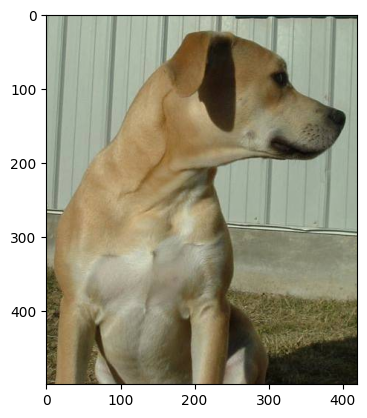

In [ ]:
dog_img = mpimg.imread('/content/train/dog.7756.jpg')
imgplt = plt.imshow(dog_img)
plt.show()

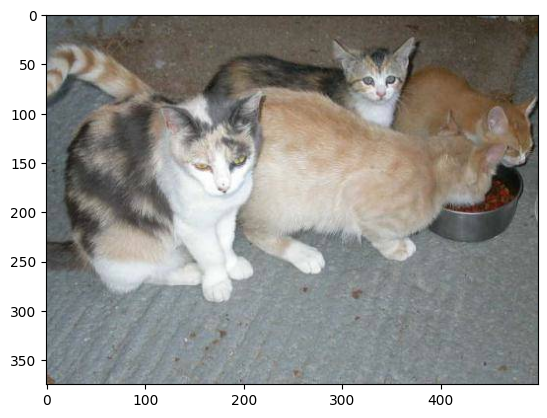

In [ ]:
cat_img = mpimg.imread('/content/train/cat.12327.jpg')
imgplt = plt.imshow(cat_img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train')

dog_count=0
cat_count=0

for i in file_names:
  names = i[0:3] # taking first 3 elements of iterations
  if names=='dog':
    dog_count+=1
  else:
    cat_count+=1
print('total images of dogs are :',dog_count)
print('total images of cats are :',cat_count)

total images of dogs are : 12500
total images of cats are : 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(4000): ## for taking 4000 photos from the training data

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224)) # converting photos in 254x254 size for model
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

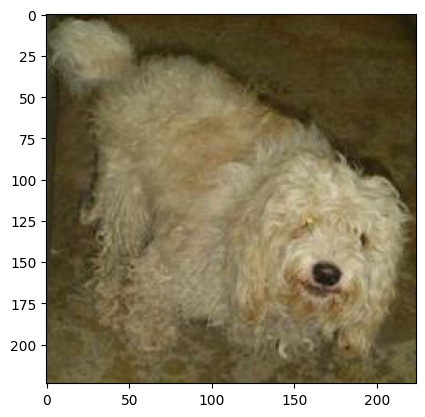

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.7534.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# renaming all the pics with dogs as 1 and of cats as 0.
file_names = os.listdir('/content/image resized/')

labels = []

for i in range(4000):
  file_name=file_names[i]
  label = file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
labels[0:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
print(file_names[0:10])

['cat.532.jpg', 'dog.7534.jpg', 'cat.10453.jpg', 'dog.1407.jpg', 'cat.372.jpg', 'cat.1732.jpg', 'cat.4802.jpg', 'cat.7393.jpg', 'cat.2701.jpg', 'cat.677.jpg']


In [ ]:
np.unique(labels,return_counts=True) # so we have almost equal images of dogs and cats

(array([0, 1]), array([2031, 1969]))

In [ ]:
import cv2
import glob

In [ ]:

image_directory = '/content/image resized/'
image_extension = ['png','jpg']
files = []
[files.extend(glob.glob(image_directory +'*.' + e))for e in image_extension]
image_data = np.asarray([cv2.imread(file) for file in files])



In [ ]:
print(image_data.shape)

(4000, 224, 224, 3)


In [ ]:
X = image_data
y=  np.asarray(labels)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2800, 224, 224, 3) (1200, 224, 224, 3) (2800,) (1200,)


In [ ]:
# normalizing the data
X_train = X_train/255
X_test = X_test/255

**Building CNN**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:

pre_trained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pre_trained_model.trainable = False

model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8679 - loss: 0.2904
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9766 - loss: 0.0687
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9876 - loss: 0.0484
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9924 - loss: 0.0353
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9895 - loss: 0.0366


In [ ]:
loss,accuracy = model.evaluate(X_test,y_test)

print('Test loss = ',loss)
print('Test Accuracy = ',accuracy)

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9710 - loss: 0.0712
Test loss =  0.07896476984024048
Test Accuracy =  0.9666666388511658


enter the path of image/content/cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


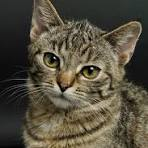

It's a Cat


In [ ]:
#  predicting system

image_path = input('enter the path of image')

image = cv2.imread(image_path)

image_resized = cv2.resize(image,(224,224))

image_scaled = image_resized/255

image_reshaped = np.reshape(image_scaled,(1,224,224,3))

image_pred = model.predict(image_reshaped)

image_pred_label = np.argmax(image_pred)

cv2_imshow(image)
if image_pred_label==1:
  print("Its a Dog")
else:
  print("It's a Cat")
